# Homework 1 : Batch Gradient Descent, Cost Optimization

## The Problem
Implement a linear regression algorithm as a gradient descent optimization that will measure how statistically dependent two variables are and apply the algorithm on the test datasets.

- The test dataset is historical fishery harvest and effort data for three groups of stakeholders
    1. Dipnet Fishermen
    2. Driftnet Fishermen
    3. Setnet Fishermen
- Data recorded on annual basis for last 15 - 30 years.
- Free variable : days fished (or permits issued)
- How correlated (or dependent) the harvest is on the fishermen's effort.

## The Procedure
- Implement regression model as cost optimization algorithm that uses batch gradient descent 
- The regression model should test function of batch size on model convergence
- Show error loss function (Y axis) over time (X axis) as function of tested batch size and number of training epochs
- Give all resulting parametric linear correlations for each dataset



## The Big Picture
- Gradient Descent : optimization algorithm often used for finding the weights or coefficients of machine learning algorithms. It works by having the model make predictions on training data and using the error on the predicitions to update the model in such a way as to reduce error.
- The goal is to find model weights that minimize the error of the model on the training dataset

The following is pseudocode for gradient descent

$ h_b(x) = b_0 + b_1x $

```python
model = initialization(...)
n_epochs = ...
train_data = ...
for i in n_epochs:
    train_data = shuffle(train_data)
```

We will use the Mean Squared Error as our loss function:
ERROR = $ ((b1*X1+b0 - Y1)^2 + (b1*X2+b0 - Y2)^2 + (b1*X3+b0 - Y3)^2) / N $


## After fitting the data
- Use R squared for goodness of fit
- R-squared: Percentage of response variation explain by linear model


# _Let's get started..._

***

## Part 1: Examine the data
The first step is to read the csv files, format the datasets as DataFrame objects, and examine the plots with regression lines based on default b0 and b1 weights.
Regression is a statistical model representing the relationship between two or more variables.

For linear regression, assumptions that will have to be made beforehand include:
- The data is uniformly distributed
- Hypothesis on free variable is within range
- N measurements > parameters
- Free variable is continuous

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

batch_sizes = [1,5,10,15,20]

# Load dataframes
dip_df = pd.read_csv("dip-har-eff.csv")

# Gather info
dip_rows = dip_df.shape[0]
dip_cols = dip_df.shape[1]

dip_df = dip_df.values
dip_df = dip_df[np.arange(0, dip_rows), :]

dip_X = dip_df[:,1]
dip_Y = dip_df[:,2]
dip_X_max = np.max(dip_X)
dip_Y_max = np.max(dip_Y)


dip_X = np.true_divide(dip_X, dip_X_max)
dip_Y = np.true_divide(dip_Y, dip_Y_max)


print(type(np.max(dip_X).item()))

# Config pyplot
plt.xlim(0, max(dip_X))
plt.ylim(0, max(dip_Y))

<class 'float'>


(0, 1.0)

In [2]:
def calcMean(results):
    results_sum = sum(results)
    return results_sum / len(results)

def calcRSquared(predicted, actual):
    return predicted / actual

def calc_total_Error(row, col):
    return (b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b1*row+b0 - col) * row

def calc_b2_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col) * row**2

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)  
    ERROR_SUM = sum(errorsList)
    return ERROR_SUM / batchSize

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)


# Gradient Descent Optimization : *Batch Size = 1*

In [3]:
import matplotlib.pyplot as plt

# init weights
b1 = 1.0
b0 = -0.5
batchSize = 1

learn = 0.4

dip_Plot = plt.figure()
dip_Plot.suptitle('Dipnet Fishermen', fontsize=14, fontweight='bold')
dip_regression = dip_Plot.add_subplot(211)
dip_loss = dip_Plot.add_subplot(212)


ax2.set_xlabel('Dipnet days fished')
ax2.set_ylabel('Dipnet fish harvest')
ax2.scatter(dip_X, dip_Y)
plt.pause(0.1);


batchSample = takeRandomBatch(len(dip_X), batchSize)
sample_X = [dip_X[i] for i in sorted(batchSample)]
sample_Y = [dip_Y[i] for i in sorted(batchSample)] 

for i in range(100):
    ERROR = mse(dip_X, dip_Y, calc_total_Error)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print("i: " + str(i) + " b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
#     dip_loss.plot(i, ERROR)
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    dip_regression.plot(X_test, b1*X_test + b0)
    plt.pause(0.1)

plt.show()

NameError: name 'ax2' is not defined

# Gradient Descent Optimization : *Batch Size = 5*

In [14]:
import matplotlib.pyplot as plt
import random

# init weights
b1 = 1.0
b0 = -0.5
batchSize = 5

learn = 0.4

fig, axs = plt.subplots(5,2,figsize=(5,3))

# plt.xlabel('Dipnet days fished')
# plt.ylabel('Dipnet days fished')
# plt.title('Dipnet fishermen')
axs[0].scatter(dip_X, dip_Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(dip_X), batchSize)
sample_X = [dip_X[i] for i in sorted(batchSample)]
sample_Y = [dip_Y[i] for i in sorted(batchSample)]

for i in range(10):
    ERROR = mse(dip_X, dip_Y, calc_total_Error)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    axs[0].plot(X_test, b1*X_test + b0)
    axs[1].plot(i, ERROR)
    plt.pause(0.1)

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

# Gradient Descent Optimization : *Batch Size=10*

 b0: -0.334145353235 b1: 1.08961383318 Error: 0.337417295794
 b0: -0.253852096692 b1: 1.13152369775 Error: 0.0888734525383
 b0: -0.214664576074 b1: 1.15053874649 Error: 0.0332973400179
 b0: -0.195230232391 b1: 1.15857473303 Error: 0.021282767438
 b0: -0.185293108942 b1: 1.16135461357 Error: 0.0188630627902
 b0: -0.179927037486 b1: 1.16162689892 Error: 0.0184409622439
 b0: -0.176765791812 b1: 1.16071145442 Error: 0.0183776026148
 b0: -0.174672708487 b1: 1.15924195985 Error: 0.0183491430552
 b0: -0.173101695129 b1: 1.15752251876 Error: 0.0183067160782
 b0: -0.171790317571 b1: 1.15569894063 Error: 0.0182513490011
[0.33741729579448598, 0.088873452538316883, 0.033297340017898185, 0.02128276743803436, 0.018863062790225878, 0.018440962243933091, 0.018377602614778922, 0.01834914305522737, 0.018306716078207157, 0.018251349001056027]


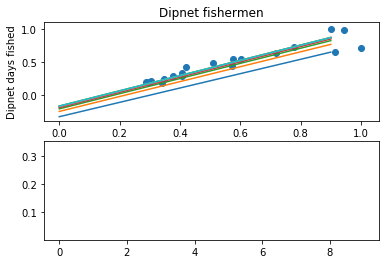

In [35]:
import matplotlib.pyplot as plt
import random

# init weights
b1 = 1.0
b0 = -0.5
batchSize = 10
epochs = 100

learn = 0.4

plt.figure(1)
plt.subplot(211)

plt.xlabel('Dipnet days fished')
plt.ylabel('Dipnet days fished')
plt.title('Dipnet fishermen')
plt.scatter(dip_X, dip_Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(dip_X), batchSize)
sample_X = [dip_X[i] for i in sorted(batchSample)]
sample_Y = [dip_Y[i] for i in sorted(batchSample)]


batch_10_ERRORS = []

for i in range(10):
    ERROR = mse(dip_X, dip_Y, calc_total_Error)
    batch_10_ERRORS.append(ERROR)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b1*X_test + b0)
    plt.pause(0.1)
    
plt.subplot(212)
    
print(batch_10_ERRORS)
for count, value in enumerate(batch_10_ERRORS):
    plt.plot(count,value)
    


plt.show()

# Gradient Descent Optimization: *Batch Size=15*

 b0: -0.346219197503 b1: 1.08592058905 Error: 0.337417295794
 b0: -0.274387724022 b1: 1.12148284871 Error: 0.099691065312
 b0: -0.23974765282 b1: 1.1342557703 Error: 0.0434196024957
 b0: -0.222001767817 b1: 1.13674067963 Error: 0.0284008992063
 b0: -0.211945295518 b1: 1.13460603037 Error: 0.0236482402369
 b0: -0.205403666039 b1: 1.13042171597 Error: 0.0218164476346
 b0: -0.200483410409 b1: 1.12535250432 Error: 0.020955658193
 b0: -0.196325498084 b1: 1.11992597608 Error: 0.0204663857108
 b0: -0.192540000679 b1: 1.11438076891 Error: 0.020135576825
 b0: -0.188949723344 b1: 1.10882449916 Error: 0.0198787383883
 b0: -0.185473946711 b1: 1.10330537595 Error: 0.0196599828036
 b0: -0.182075706153 b1: 1.09784467671 Error: 0.0194634306526
 b0: -0.178737883919 b1: 1.09245147393 Error: 0.0192818420588
 b0: -0.175452367338 b1: 1.08712931344 Error: 0.0191118010386
 b0: -0.172215132216 b1: 1.08187924269 Error: 0.0189516063602
 b0: -0.169024013181 b1: 1.07670118396 Error: 0.0188003325196
 b0: -0.165877

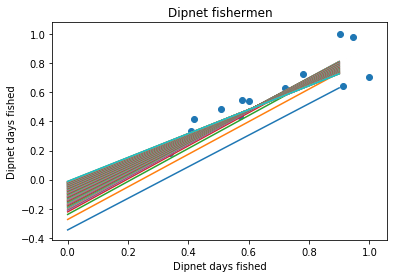

In [14]:
import matplotlib.pyplot as plt
import random

# init weights
b1 = 1.0
b0 = -0.5
batchSize = 15

learn = 0.4

plt.xlabel('Dipnet days fished')
plt.ylabel('Dipnet days fished')
plt.title('Dipnet fishermen')
plt.scatter(dip_X, dip_Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(dip_X), batchSize)
sample_X = [dip_X[i] for i in sorted(batchSample)]
sample_Y = [dip_Y[i] for i in sorted(batchSample)]

for i in range(100):
    ERROR = mse(dip_X, dip_Y, calc_total_Error)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b1*X_test + b0)
    plt.pause(0.1)

plt.show()

In [24]:
def calcPrediction(b1, b0):
    return b1*18513+b0

print(calcPrediction(0.873221979884, -0.0248726166641))

16165.933640975827
